# QDrift

In [1]:
from trotter.hamsimtrotter import AlgorithmHamSimTrotter
from qDrift.hamsimqDrift import AlgorithmHamSimqDrift
from pytket.pauli import Pauli, QubitPauliString
from pytket.utils import QubitPauliOperator
from pytket.circuit import Circuit,Qubit,fresh_symbol

from utils.term_grouping import *
from utils.min_clique import *
from utils.hamlib import LiH
from utils.evol_real import *
from utils.plot import *

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

def gen_sys_param(n=10, sample_steps=10):
    global t_max
    global initial_state_circ
    global n_qdrift_steps
    global sample_space

    t_max=2
    initial_state_circ = Circuit(n)
    n_qdrift_steps = sample_steps
    sample_space = np.arange(0,sample_steps+1,1)

# Expectation

In [3]:
# gen_sys_param()
# n_qdrift_steps = 100
# drift_time_evolution = AlgorithmHamSimqDrift(initial_state_circ,Heisenberg_d,Heisenberg_c,Heisenberg[0],t_max,n_qdrift_steps,t)
# drift_time_evolution.Drift_exp()
# trotter_time_evolution_cheat = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[0],measurements,t_max,n_qdrift_steps,t)
# trotter_time_evolution_cheat._trotter_step_cheat(exps='Energy')
# drift_time_evolution.execute(list(trotter_time_evolution_cheat._real_measurement.values()), color='purple')

# Error bound

In [4]:
# gen_sys_param()
# error = 1
# n_qdrift_steps = 3
# while error > 1e-4:
#     U_sims = []
#     gen_sys_param()
#     time_evolution = AlgorithmHamSimqDrift(initial_state_circ,Heisenberg_d,Heisenberg_c,Heisenberg[0],t_max,n_qdrift_steps,t)
#     time_evolution.Drift_exp()
#     U_sim = time_evolution.execute()
#     U_sims.append(U_sim)
#     trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[0],measurements,t_max,n_qdrift_steps,t)
#     U = trotter_time_evolution.execute(color='green', cheat=False, plot=False)
#     error = calculate_error(U_sims, U)
#     print('step:',n_qdrift_steps,'error:',error)
#     if error < precision:
#         print('Congratulations!')
#     n_qdrift_steps *= 10

'''
step: 3 error: 1.8507102429864286
step: 30 error: 1.749055560834051
step: 300 error: 1.300882374374903
step: 3000 error: 0.7472272607324455
step: 30000 error: 0.1812082026023719
step: 300000 error: 0.059744391798576615
'''

'\nstep: 3 error: 1.8507102429864286\nstep: 30 error: 1.749055560834051\nstep: 300 error: 1.300882374374903\nstep: 3000 error: 0.7472272607324455\nstep: 30000 error: 0.1812082026023719\nstep: 300000 error: 0.059744391798576615\n'

# Term grouping

In [2]:
H_matrix, ops_dict, ops2, H_ops_orig, H_coeff_orig = generate_dict(LiH())
min_clique_cover = create_clique(ops2, ops_dict)
H_coeff = []
for i,clique in enumerate(min_clique_cover):
    H_coeff.append([])
    for op in clique:
        H_coeff[i].append(ops_dict[op])

In [3]:
gen_sys_param(sample_steps = 5)
drift_time_evolution = AlgorithmHamSimqDrift(initial_state_circ,min_clique_cover,H_coeff,t_max,n_qdrift_steps)
particle_no = drift_time_evolution.Drift_exp()

[['IIIIIZIIII', 'ZIIIIIIIII', 'IIZIIIIIII', 'IIIIIIIZII', 'IIIIIIZIII', 'IZIIIIIIII', 'IIIZIIIIII', 'IIIIIIIIZI', 'IIIIIIIIIZ', 'IIIIZIIIII', 'IIIIZIIIIZ', 'ZIIIIIIIIZ', 'IIIIZZIIII', 'ZIIIIZIIII', 'IIIZIIIIZI', 'IIIIIZIIIZ', 'ZIIIZIIIII', 'IIZIIIIZII', 'IZIIIIZIII', 'IZIIIIIIZI', 'IIIZIIZIII', 'IIIZIIIZII', 'IIZIIIIIZI', 'IZIIIIIZII', 'IIZIIIZIII', 'IIIIZIIZII', 'IIZIIIIIIZ', 'IZIIIIIIIZ', 'IIIIZIZIII', 'IZIIIZIIII', 'IIZIIZIIII', 'ZIIIIIIZII', 'ZIIIIIZIII', 'IZZIIIIIII', 'IIIIIIZZII', 'IIIIIIZIIZ', 'IZIIZIIIII', 'IIZIZIIIII', 'IIIIIIIZIZ', 'IIIIIZZIII', 'ZZIIIIIIII', 'IIIIIZIZII', 'ZIZIIIIIII', 'IIIZIZIIII', 'ZIIIIIIIZI', 'IIZZIIIIII', 'IIIIIIIZZI', 'IZIZIIIIII', 'IIIIIIZIZI', 'IIIIZIIIZI', 'IIIZIIIIIZ', 'IIIIIZIIZI', 'ZIIZIIIIII', 'IIIZZIIIII', 'IIIIIIIIZZ'], ['IIIIIZIIII', 'ZIIIIIIIII', 'IIZIIIIIII', 'IIIIIIIZII', 'IIIIIIZIII', 'IZIIIIIIII', 'IIIZIIIIII', 'IIIIIIIIZI', 'IIIIIIIIIZ', 'IIIIZIIIII', 'IIIIZIIIIZ', 'ZIIIIIIIIZ', 'IIIIZZIIII', 'ZIIIIZIIII', 'IIIZIIIIZI', 'IIIIIZIIIZ', 'Z

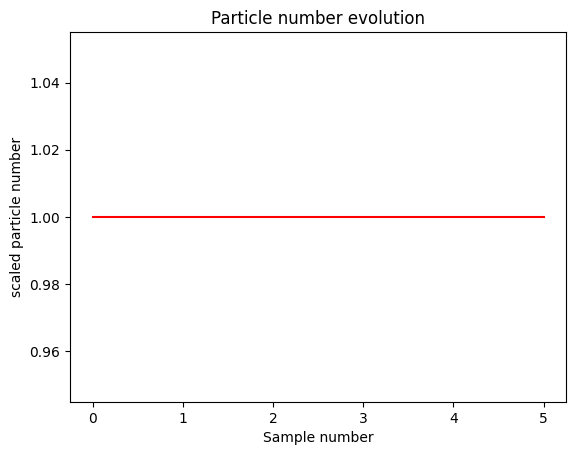

In [9]:
particle_number(sample_space,particle_no, label='term grouped', color='r')

In [24]:
# compare spectral error
# gen_sys_param(sample_steps = 10)
# drift_time_evolution = AlgorithmHamSimqDrift(initial_state_circ,min_clique_cover,H_coeff,t_max,n_qdrift_steps)
# Us = drift_time_evolution.Drift_exp()

In [10]:
gen_sys_param(sample_steps = 10)
drift_time_evolution = AlgorithmHamSimqDrift(initial_state_circ,H_ops_orig,H_coeff_orig,t_max,n_qdrift_steps)
particle_no_orig = drift_time_evolution.Drift_exp()

[['IIIIIIIIII'], ['IIIIIIIIII'], ['IIIIIZIIII'], ['IYZYIIXZXI'], ['IZIIIZIIII'], ['IIIIIZIIII'], ['ZIIIIIIIII'], ['ZIIIIIIZII'], ['YZZYIIIIII'], ['IIIZIIIZII']] [1.2701698060168896, 1.2701698060168896, 1.2701698060168896, 1.2701698060168896, -1.2701698060168896, -1.2701698060168896, -1.2701698060168896, -1.2701698060168896, 1.2701698060168896, 1.2701698060168896, 1.2701698060168896, 1.2701698060168896, -1.2701698060168896, -1.2701698060168896, 1.2701698060168896, 1.2701698060168896, -1.2701698060168896, -1.2701698060168896, -1.2701698060168896, -1.2701698060168896, -1.2701698060168893, -1.2701698060168893, 1.2701698060168896, 1.2701698060168896, 1.2701698060168896, 1.2701698060168896, 1.2701698060168896, 1.2701698060168896, 1.2701698060168896, 1.2701698060168896, 1.2701698060168896, 1.2701698060168896, 1.2701698060168896, 1.2701698060168896, 1.2701698060168896, 1.2701698060168896, 1.2701698060168896, 1.2701698060168896, -1.2701698060168896, -1.2701698060168896, -1.2701698060168896, -1.

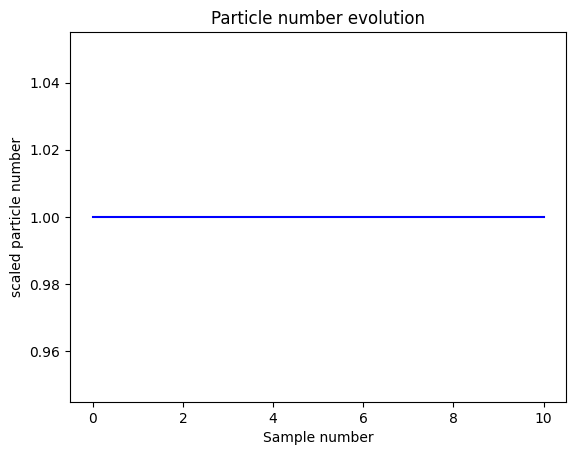

In [11]:
particle_number(sample_space,particle_no_orig, label='original qdrift', color='b')

In [37]:
# gen_sys_param(sample_steps=10)
# drift_time_evolution = AlgorithmHamSimqDrift(initial_state_circ,H_ops_orig,H_coeff_orig,t_max,n_qdrift_steps)
# Us_orig = drift_time_evolution.Drift_exp()

In [38]:
# U = U_exc(drift_time_evolution._initial_state,n_qdrift_steps, t_max, H_matrix)
# compare_spectral_error(sample_space, U, Us, Us_orig)